In [11]:
import pandas as pd

# column = 'race'
# group1 = 'white'
# group2 = 'black'

column = 'gender'
group1 = 'male'
group2 = 'female'

# column = 'age'
# group1 = 'child'
# group2 = 'adult'

# column = 'edulevel'
# group1 = 'low'
# group2 = 'high'

file_path = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_{column}.csv'

df = pd.read_csv(file_path)
df.drop('Unnamed: 0', axis=1, inplace=True)
df_gr1 = df[df['ptid_group'] == group1]
df_gr2 = df[df['ptid_group'] == group2]
df
df_gr1

,PtID,ratio,ptid_test,ptid_group,rmse_naive,rmse_single,rmse_base,rmse_tl
3,120,50,120,male,1.653102,1.558303,1.446260,1.388604
7,60,20,60,male,2.950342,3.143933,2.499256,2.529281
9,46,30,46,male,2.187254,3.458359,1.778415,1.768740
14,49,30,49,male,2.820466,2.764847,2.314351,2.300578
15,94,0,94,male,1.941222,1.952451,1.604865,1.613957
...,...,...,...,...,...,...,...,...
2242,38,30,38,male,2.267859,2.301752,1.876584,1.881001
2244,207,70,207,male,3.371553,4.381886,2.852813,2.837714
2245,62,40,62,male,2.970981,3.735064,2.619320,2.615783
2246,45,100,45,male,2.016796,1.925758,1.905438,1.846975


In [12]:
df_gr2

,PtID,ratio,ptid_test,ptid_group,rmse_naive,rmse_single,rmse_base,rmse_tl
0,7,90,7,female,2.011643,2.201581,1.537105,1.531627
1,83,50,83,female,2.526862,2.244087,1.986418,1.970185
2,5,10,5,female,1.277876,1.333196,1.214352,1.094050
4,21,80,21,female,2.721661,2.782691,2.394147,2.326223
5,230,0,230,female,2.688671,3.008549,2.220163,2.192831
...,...,...,...,...,...,...,...,...
2249,122,30,122,female,2.937598,2.995343,2.452085,2.340176
2250,21,60,21,female,2.721661,2.787249,2.416983,2.345664
2252,104,20,104,female,2.648725,2.753988,2.540208,2.370006
2253,8,70,8,female,4.042003,4.630995,3.283120,3.208880


In [21]:
def calculate_mean_and_95CI(df):
  
    import numpy as np
    import seaborn as sns

    # List of RMSE columns
    rmse_columns = [col for col in df.columns if 'rmse_' in col]

    # Initialize a list to store each row of the final DataFrame
    rows_list = []
    stats_dict = {}

    # Calculate the statistics for each RMSE column
    for col in rmse_columns:
        col_data = df[col].dropna()  # Exclude NaN values for the calculation
        mean = col_data.mean()
        median = col_data.median()
        std = col_data.std()
        # Confidence interval calculation
        ci_lower = mean - 1.96 * (std / np.sqrt(len(col_data)))
        ci_upper = mean + 1.96 * (std / np.sqrt(len(col_data)))
        
        # Store the statistics in the dictionary
        stats_dict[f'{col}_mean'] = mean
        # stats_dict[f'{col}_median'] = median
        # stats_dict[f'{col}_std'] = std
        stats_dict[f'{col}_95p_CI_Lower'] = ci_lower
        stats_dict[f'{col}_95p_CI_Upper'] = ci_upper

    # Append the stats for the current ratio to the rows_list
    rows_list.append(stats_dict)

    # Create the final DataFrame
    df_stats = pd.DataFrame(rows_list)
    return df_stats

df_results1 = calculate_mean_and_95CI(df_gr1)
df_results2 = calculate_mean_and_95CI(df_gr2)
df_results = calculate_mean_and_95CI(df)
# df_results1.T
df_results2.T

,0
rmse_naive_mean,2.528152
rmse_naive_95p_CI_Lower,2.486813
rmse_naive_95p_CI_Upper,2.569491
rmse_single_mean,2.693549
rmse_single_95p_CI_Lower,2.637936
rmse_single_95p_CI_Upper,2.749163
rmse_base_mean,2.116719
rmse_base_95p_CI_Lower,2.083405
rmse_base_95p_CI_Upper,2.150033
rmse_tl_mean,2.086584


In [27]:
file_path_gender = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_gender.csv'
file_path_age = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_age.csv'
file_path_race = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_race.csv'

df_gender = pd.read_csv(file_path_gender)
df_age = pd.read_csv(file_path_age)
df_race = pd.read_csv(file_path_race)

df_gender.drop('Unnamed: 0', axis=1, inplace=True)
df_age.drop('Unnamed: 0', axis=1, inplace=True)
df_race.drop('Unnamed: 0', axis=1, inplace=True)


df_combined = pd.concat([df_race, df_gender, df_age ], axis=0)
df_combined
df_results = calculate_mean_and_95CI(df_combined)

In [28]:
df_results.T

,0
rmse_naive_mean,2.427535
rmse_naive_95p_CI_Lower,2.412339
rmse_naive_95p_CI_Upper,2.442732
rmse_single_mean,2.603708
rmse_single_95p_CI_Lower,2.583707
rmse_single_95p_CI_Upper,2.623710
rmse_base_mean,2.042543
rmse_base_95p_CI_Lower,2.029985
rmse_base_95p_CI_Upper,2.055101
rmse_tl_mean,2.013439


In [15]:
import seaborn as sns

def calc_stats_results(df):
  
    import numpy as np
    import seaborn as sns

    # List of RMSE columns
    rmse_columns = [col for col in df.columns if 'rmse_' in col]
    # Initialize a list to store each row of the final DataFrame
    rows_list = []

    # Loop over each ratio_w value
    for ratio in df['ratio'].unique():
        # Filter the DataFrame for the current ratio
        df_ratio = df[df['ratio'] == ratio]
        
        # Initialize a dictionary to store the stats for the current ratio
        stats_dict = {'ratio': ratio}
        
        # Calculate the statistics for each RMSE column
        for col in rmse_columns:
            col_data = df_ratio[col].dropna()  # Exclude NaN values for the calculation
            mean = col_data.mean()
            median = col_data.median()
            std = col_data.std()
            # Confidence interval calculation
            ci_lower = mean - 1.96 * (std / np.sqrt(len(col_data)))
            ci_upper = mean + 1.96 * (std / np.sqrt(len(col_data)))
            
            # Store the statistics in the dictionary
            stats_dict[f'{col}_mean'] = mean
            # stats_dict[f'{col}_median'] = median
            # stats_dict[f'{col}_std'] = std
            stats_dict[f'{col}_95p_CI_Lower'] = ci_lower
            stats_dict[f'{col}_95p_CI_Upper'] = ci_upper

        # Append the stats for the current ratio to the rows_list
        rows_list.append(stats_dict)

    # Create the final DataFrame
    df_stats = pd.DataFrame(rows_list)
    return df_stats

df_stats_gr1 = calc_stats_results(df_gr1)
df_stats_gr2 = calc_stats_results(df_gr2)

In [16]:
df_stats_gr1

,ratio,rmse_naive_mean,rmse_naive_95p_CI_Lower,rmse_naive_95p_CI_Upper,rmse_single_mean,rmse_single_95p_CI_Lower,rmse_single_95p_CI_Upper,rmse_base_mean,rmse_base_95p_CI_Lower,rmse_base_95p_CI_Upper,rmse_tl_mean,rmse_tl_95p_CI_Lower,rmse_tl_95p_CI_Upper
0,50,2.528152,2.390331,2.665973,2.805921,2.586181,3.025661,2.112250,2.002024,2.222477,2.081699,1.974874,2.188524
1,20,2.528152,2.390331,2.665973,2.641704,2.483567,2.799842,2.112604,2.002328,2.222880,2.081635,1.974795,2.188476
2,30,2.528152,2.390331,2.665973,2.704480,2.549521,2.859438,2.111292,2.001028,2.221556,2.081118,1.974359,2.187877
3,0,2.528152,2.390331,2.665973,2.691293,2.517348,2.865238,2.125582,2.014567,2.236598,2.096178,1.988751,2.203604
4,80,2.528152,2.390331,2.665973,2.648158,2.485635,2.810681,2.112862,2.001990,2.223733,2.082164,1.974729,2.189600
5,10,2.528152,2.390331,2.665973,2.685131,2.505904,2.864358,2.113611,2.003322,2.223900,2.082720,1.975804,2.189635
6,40,2.528152,2.390331,2.665973,2.800053,2.525575,3.074531,2.112788,2.002117,2.223460,2.082835,1.975653,2.190017
7,90,2.528152,2.390331,2.665973,2.694444,2.521151,2.867737,2.113084,2.002511,2.223657,2.082081,1.975162,2.189001
8,100,2.528152,2.390331,2.665973,2.605856,2.445825,2.765886,2.135669,2.019522,2.251817,2.107348,1.992890,2.221805
9,60,2.528152,2.390331,2.665973,2.658156,2.490485,2.825827,2.111785,2.001221,2.222349,2.081956,1.974956,2.188956


In [17]:
# file_path_save = f'../results/processed_data/3_1_calculated_ressults/3_2_rmse_summary_per_ratio_{column}.csv'
# df_stats_gr1.to_csv(file_path_save)

In [18]:
df

,PtID,ratio,ptid_test,ptid_group,rmse_naive,rmse_single,rmse_base,rmse_tl
0,7,90,7,female,2.011643,2.201581,1.537105,1.531627
1,83,50,83,female,2.526862,2.244087,1.986418,1.970185
2,5,10,5,female,1.277876,1.333196,1.214352,1.094050
3,120,50,120,male,1.653102,1.558303,1.446260,1.388604
4,21,80,21,female,2.721661,2.782691,2.394147,2.326223
...,...,...,...,...,...,...,...,...
2250,21,60,21,female,2.721661,2.787249,2.416983,2.345664
2251,44,50,44,male,2.035758,1.862145,1.761998,1.700406
2252,104,20,104,female,2.648725,2.753988,2.540208,2.370006
2253,8,70,8,female,4.042003,4.630995,3.283120,3.208880


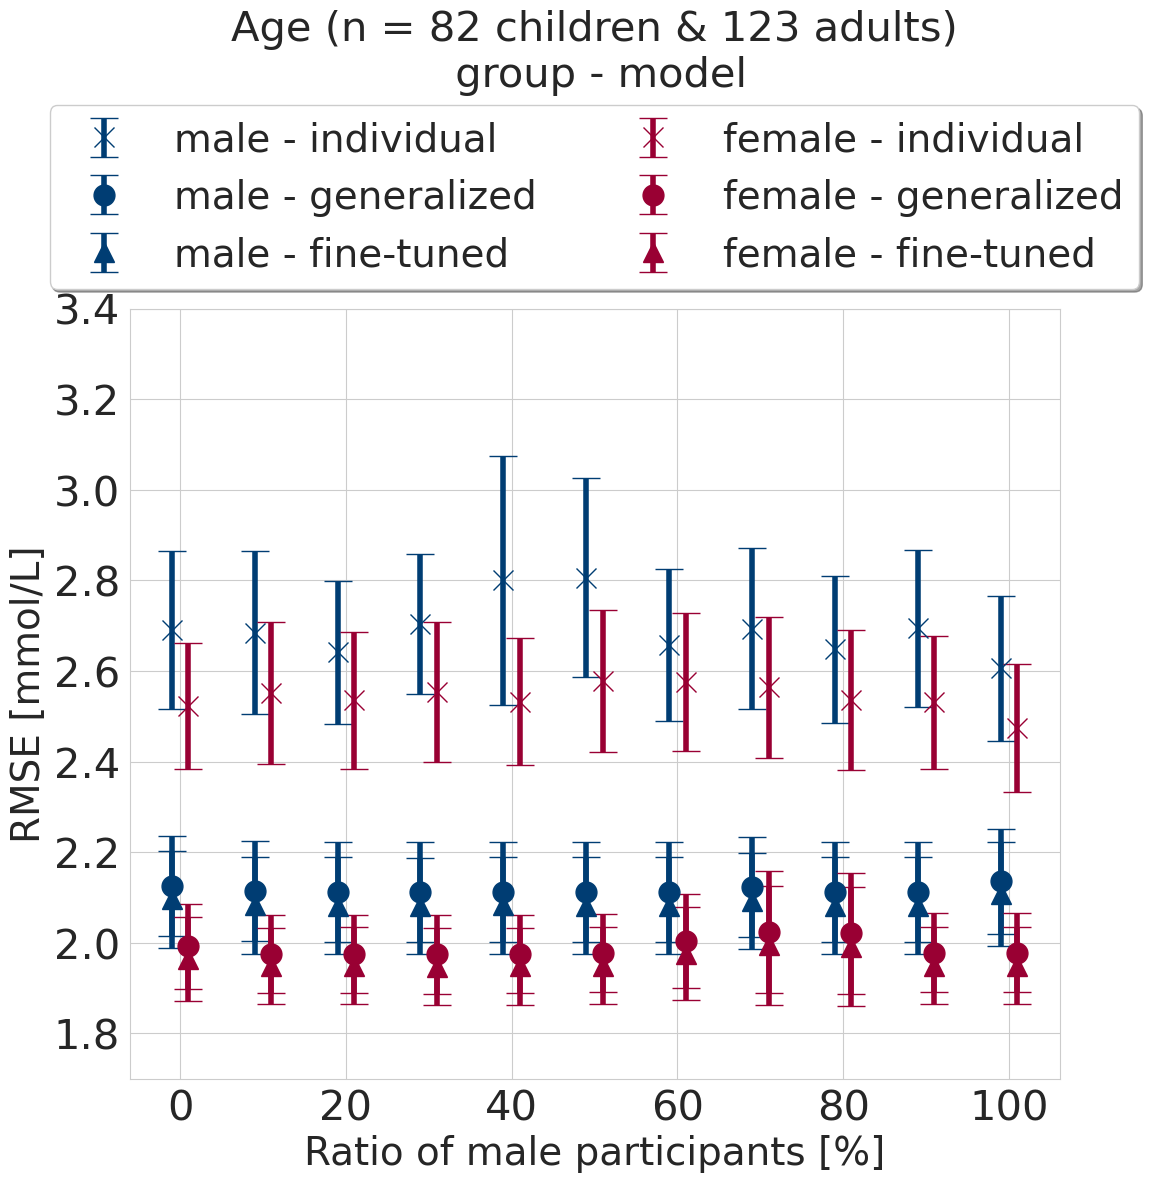

In [19]:
import matplotlib.pyplot as plt

file_name_with_extension = file_path.split("/")[-1]
file_name = file_name_with_extension.split(".")[0]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

rmse_col_gr1 = df_gr1['rmse_base']
rmse_col_gr2 = df_gr2['rmse_base']

rmse_col_tl_gr1 = df_gr1['rmse_tl']
rmse_col_tl_gr2 = df_gr2['rmse_tl']

rmse_col_gr1_single = df_gr1['rmse_single']
rmse_col_gr2_single = df_gr2['rmse_single']

gr1_color = "#003d73"
gr2_color = "#990033"
# gr1_color = "#D79B00"
# gr2_color = "#9673A6"
# gr3_color = "#21918c"
alpha_value = 0.5  # saturation
marker1 = "o"
marker2 = "^"
marker3 = "x"

y_group1 = df_stats_gr1['rmse_base_mean']
y_group2 = df_stats_gr2['rmse_base_mean']
y_group1_CI95_l = df_stats_gr1['rmse_base_95p_CI_Lower']
y_group1_CI95_u = df_stats_gr1['rmse_base_95p_CI_Upper']
y_group2_CI95_l = df_stats_gr2['rmse_base_95p_CI_Lower']
y_group2_CI95_u = df_stats_gr2['rmse_base_95p_CI_Upper']

y_group1_tl = df_stats_gr1['rmse_tl_mean']
y_group2_tl = df_stats_gr2['rmse_tl_mean']
y_group1_CI95_l_tl = df_stats_gr1['rmse_tl_95p_CI_Lower']
y_group1_CI95_u_tl = df_stats_gr1['rmse_tl_95p_CI_Upper']
y_group2_CI95_l_tl = df_stats_gr2['rmse_tl_95p_CI_Lower']
y_group2_CI95_u_tl = df_stats_gr2['rmse_tl_95p_CI_Upper']

y_group1_single = df_stats_gr1['rmse_single_mean']
y_group2_single = df_stats_gr2['rmse_single_mean']
y_group1_CI95_l_single = df_stats_gr1['rmse_single_95p_CI_Lower']
y_group1_CI95_u_single = df_stats_gr1['rmse_single_95p_CI_Upper']
y_group2_CI95_l_single = df_stats_gr2['rmse_single_95p_CI_Lower']
y_group2_CI95_u_single = df_stats_gr2['rmse_single_95p_CI_Upper']


offset = 1  # How much to offset the bars

x_values_gr1 = df_stats_gr1['ratio'] - offset
x_values_gr2 = df_stats_gr2['ratio'] + offset
x_tl_values_gr1 = df_stats_gr1['ratio'] - offset
x_tl_values_gr2 = df_stats_gr2['ratio'] + offset
x_single_values_gr1 = df_stats_gr1['ratio'] - offset
x_single_values_gr2 = df_stats_gr2['ratio'] + offset

# Calculate the errors from the means to the confidence interval limits
yerr_group1 = [y_group1 - y_group1_CI95_l, y_group1_CI95_u - y_group1]
yerr_group2 = [y_group2 - y_group2_CI95_l, y_group2_CI95_u - y_group2]

yerr_group1_tl = [y_group1_tl - y_group1_CI95_l_tl, y_group1_CI95_u_tl - y_group1_tl]
yerr_group2_tl = [y_group2_tl - y_group2_CI95_l_tl, y_group2_CI95_u_tl - y_group2_tl]


yerr_group1_single = [y_group1_single - y_group1_CI95_l_single, y_group1_CI95_u_single - y_group1_single]
yerr_group2_single = [y_group2_single - y_group2_CI95_l_single, y_group2_CI95_u_single - y_group2_single]




my_einwidth = 4

# Plot the single means with error bars
plt.errorbar(x=x_single_values_gr1, y=y_group1_single, yerr=yerr_group1_single, fmt=marker3, color=gr1_color, label=f'{group1} - individual', capsize=10, markersize=15, elinewidth=my_einwidth)
# Plot the means with error bars
plt.errorbar(x=x_values_gr1, y=y_group1, yerr=yerr_group1, fmt=marker1, color=gr1_color, label=f'{group1} - generalized', capsize=10, markersize=15, elinewidth=my_einwidth) # , elinewidth=10, markersize=15, capthick=10)
# Plot the transfer learning means with error bars
plt.errorbar(x=x_tl_values_gr1, y=y_group1_tl, yerr=yerr_group1_tl, fmt=marker2, color=gr1_color, label=f'{group1} - fine-tuned', capsize=10, markersize=15, elinewidth=my_einwidth)
# repeat for group 2
plt.errorbar(x=x_single_values_gr2, y=y_group2_single, yerr=yerr_group2_single, fmt=marker3, color=gr2_color, label=f'{group2} - individual', capsize=10, markersize=15, elinewidth=my_einwidth)
plt.errorbar(x=x_values_gr2, y=y_group2, yerr=yerr_group2, fmt=marker1, color=gr2_color, label=f'{group2} - generalized', capsize=10, markersize=15, elinewidth=my_einwidth) # elinewidth=10, markersize=14, capthick=10)
plt.errorbar(x=x_tl_values_gr2, y=y_group2_tl, yerr=yerr_group2_tl, fmt=marker2, color=gr2_color, label=f'{group2} - fine-tuned', capsize=10, markersize=15, elinewidth=my_einwidth)


# Set the legend and labels
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')#, title="RMSE",title_fontsize='25')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize='28') # this was the last one I used!!!!!!!!
# plt.title(f'{file_name}: \n Mean RMSE and 95%CI', fontsize=30)
# plt.title(f'Race (n = 101 whites & 104 blacks)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
# plt.title(f'Sex (n = 88 males & 117 females)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
plt.title(f'Age (n = 82 children & 123 adults)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
# plt.suptitle('group - model', fontsize=30, va='center')
plt.xlabel(f'Ratio of {group1} participants [%]', fontsize=28)
plt.ylabel('RMSE [mmol/L]', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylim(bottom=1.7)
plt.ylim(top=3.4)
# plt.xticks(df_stats_gr1['ratio'])
# plt.text(53, 0.2, 'Average RMSEs across all ratios \n(mean[95% CI] mmol/L)\n     Before fine-tuning\n        White: 2.81[2.76, 2.85]\n        Black: 2.71[2.65, 2.77]\n     After fine-tuning\n        White: 2.06[2.04, 2.09]\n        Black: 2.00[1.98, 2.03]', fontsize=18,
#          bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
# plt.ylim(0, 3.5)



# Show the plot
# Get current axes


plt.show()

y_diff1 = y_group1-y_group1_tl
y_diff2 = y_diff1.mean()


y_diff3 = y_group2-y_group2_tl
y_diff4 = y_diff3.mean()

In [20]:
## Plot to compare to baseline

import numpy as np
# Define a function to create the plot based on the RMSE column names
def plot_rmse(df, df_stats, rmse_col_w, rmse_col_b, file_name, gr1_color = 'b', gr2_color = 'r'):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))

    # Group by ratio and calculate means
    df_mean = df.groupby('ratio')[[rmse_col_w, rmse_col_b]].mean().reset_index()

    # Get the mean and standard deviation values
    y_group1 = df_mean[rmse_col_w]
    y_group2 = df_mean[rmse_col_b]
    y_group1_CI95 = df_stats[rmse_col_w + '_std']
    y_group2_CI95 = df_stats[rmse_col_b + '_std']

    # Plot settings
    my_s = 150
    my_s2 = 100

    # Plot the means
    plt.scatter(x=df_mean['ratio'], y=y_group1, label=rmse_col_w, color=gr1_color, s=my_s)
    plt.scatter(x=df_mean['ratio'], y=y_group2, label=rmse_col_b, color=gr2_color, s=my_s)

    # Plot the standard deviations
    plt.scatter(x=df_mean['ratio'], y=y_group1 - y_group1_CI95, color=gr1_color, marker='_', s=my_s2, label = f'std of {rmse_col_w}:')
    plt.scatter(x=df_mean['ratio'], y=y_group1 + y_group1_CI95, color=gr1_color, marker='_', s=my_s2)
    plt.scatter(x=df_mean['ratio'], y=y_group2 - y_group2_CI95, color=gr2_color, marker='_', s=my_s2, label = f'std of {rmse_col_b}:')
    plt.scatter(x=df_mean['ratio'], y=y_group2 + y_group2_CI95, color=gr2_color, marker='_', s=my_s2)

    # Set the legend and labels
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')
    plt.title(f'{file_name}: \n Mean RMSE and Standard Deviation of {rmse_col_w} and {rmse_col_b}', fontsize=30)
    plt.xlabel('Ratio', fontsize=24)
    plt.ylabel('Mean RMSE', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=20)

    # Show the plot
    plt.show()

  


# plotting baselines to see if my model performs better then the naive approach
# rmse_pairs_base = [
#     ('rmse_base_w', 'rmse_w'),
#     ('rmse_base_b', 'rmse_b'),
#     ('rmse_base_tl_w', 'rmse_tlw_w'),
#     ('rmse_base_tl_b', 'rmse_tlw_b'),
#     ('rmse_base_tl_w', 'rmse_tlb_w'),
#     ('rmse_base_tl_b', 'rmse_tlb_b')
# ]

# for rmse_w, rmse_b in rmse_pairs_base:
#     plot_rmse(df, df_stats, rmse_w, rmse_b, file_name, gr1_color='g')



# #%% plot predictions

# # Assuming you want values for a specific PtID
# desired_ptID = 'your_target_ptID'

# # Accessing the values directly
# percentage, value = dictionary[desired_ptID]

# # Accessing the specific values for the desired PtID
# y_actual_w = value['y_test_w']




